In [1]:
#basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluvation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.datasets import fashion_mnist

In [2]:
fashion_train=pd.read_csv("fashion-mnist_train.csv")
fashion_test=pd.read_csv("fashion-mnist_test.csv")

In [3]:
fashion_train.shape

(60000, 785)

In [4]:
fashion_test.shape

(10000, 785)

In [5]:
#Train & Test split
X_train_fashion=fashion_train.drop('label',axis=1)#only i/p train set should be there,so drop the label
y_train_fashion=fashion_train['label']#only train set o/p label should be there
X_test_fashion=fashion_test.drop('label',axis=1)#only i/p test set should be there,so drop the label
y_test_fashion=fashion_test['label']#only test set o/p label should be there

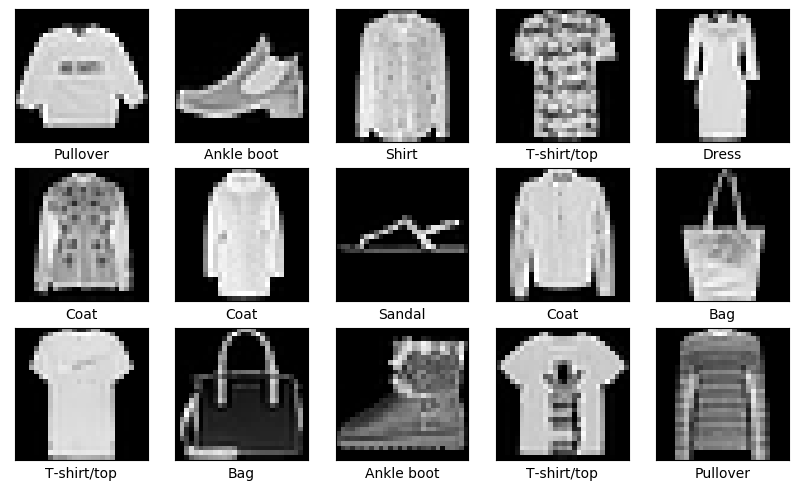

In [6]:
#Reshaping the dataset
X_train_reshape=X_train_fashion.values.reshape(-1,28,28)#28*28=784(-1,28,28)
X_test_reshape=X_test_fashion.values.reshape(-1,28,28)

#Name of the cloth accessories in order
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_reshape[i],cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])

In [7]:
#o/p should be one hot encoding
y_train_fashion=to_categorical(y_train_fashion,num_classes=10)
y_test_fashion=to_categorical(y_test_fashion,num_classes=10)

In [8]:
#Model Creation
model=keras.Sequential([
    layers.Dense(128,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 24)                3096      
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                        

In [10]:
#Compiling the model
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics='accuracy')

In [11]:
#fitting the model
history=model.fit(X_train_fashion,y_train_fashion,batch_size=100,epochs=30,validation_data=(X_test_fashion,y_test_fashion))

Epoch 1/30
600/600 [==============================] - 9s 10ms/step - loss: 1.0771 - accuracy: 0.6292 - val_loss: 0.5536 - val_accuracy: 0.8101
Epoch 2/30
600/600 [==============================] - 5s 8ms/step - loss: 0.7365 - accuracy: 0.7468 - val_loss: 0.4696 - val_accuracy: 0.8444
Epoch 3/30
600/600 [==============================] - 5s 9ms/step - loss: 0.6580 - accuracy: 0.7757 - val_loss: 0.4661 - val_accuracy: 0.8275
Epoch 4/30
600/600 [==============================] - 5s 8ms/step - loss: 0.6240 - accuracy: 0.7900 - val_loss: 0.4324 - val_accuracy: 0.8532
Epoch 5/30
600/600 [==============================] - 5s 9ms/step - loss: 0.6012 - accuracy: 0.7965 - val_loss: 0.4314 - val_accuracy: 0.8474
Epoch 6/30
600/600 [==============================] - 5s 8ms/step - loss: 0.5819 - accuracy: 0.8051 - val_loss: 0.4162 - val_accuracy: 0.8624
Epoch 7/30
600/600 [==============================] - 5s 8ms/step - loss: 0.5808 - accuracy: 0.8056 - val_loss: 0.4219 - val_accuracy: 0.8593
Epoch

In [12]:
test_loss_fashion,test_acc_fashion=model.evaluate(X_test_fashion,y_test_fashion)

313/313 [==============================] - 1s 3ms/step - loss: 0.4088 - accuracy: 0.8612


In [13]:
print('Fashion MNIST Test Accuracy:',round(test_acc_fashion,4))

Fashion MNIST Test Accuracy: 0.8612


In [14]:
#Predicting the label fashion
y_predict_fash=model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash,axis=1)
y_test_fash_eval=np.argmax(y_test_fashion,axis=1)

313/313 [==============================] - 1s 3ms/step


Text(0.5, 1, 'True or False Predicted Fashion MNIST/n')

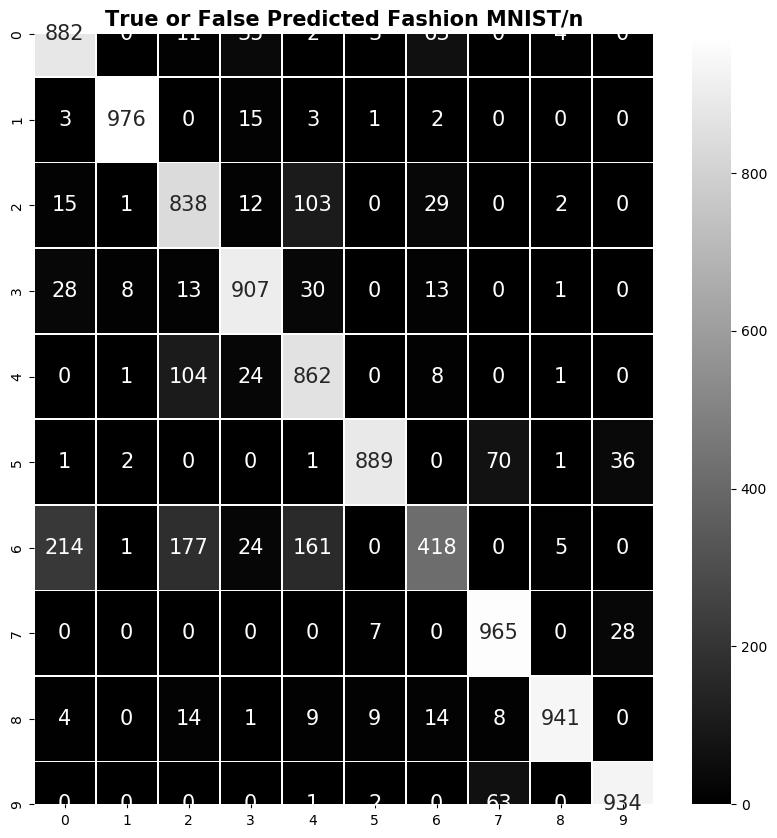

In [15]:
#Confusion matrix for digit Mnist
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap='gray')
plt.title('True or False Predicted Fashion MNIST/n',fontweight='bold',fontsize=15)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.72      0.84      0.78      1000
           3       0.89      0.91      0.90      1000
           4       0.74      0.86      0.79      1000
           5       0.98      0.89      0.93      1000
           6       0.76      0.42      0.54      1000
           7       0.87      0.96      0.92      1000
           8       0.99      0.94      0.96      1000
           9       0.94      0.93      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


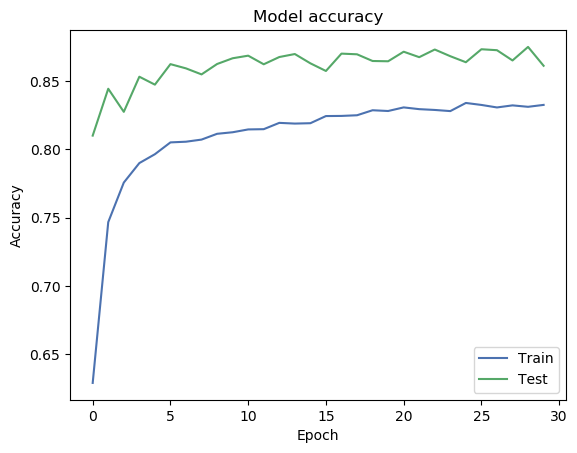

In [18]:
#summarize history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='best')
plt.show()

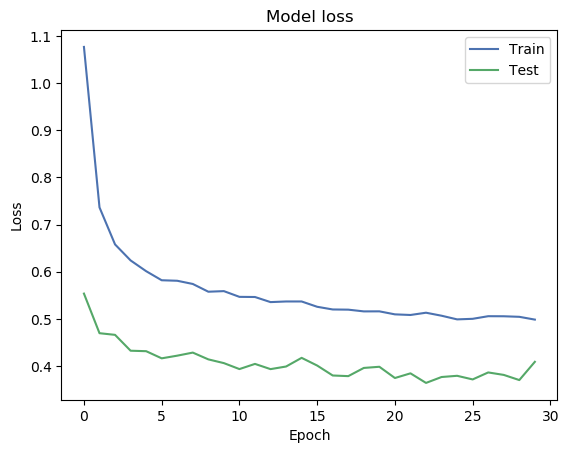

In [19]:
#summarize history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [20]:
#Validate the model process (Crosscheck)
#tf.expand_dims(X_test_digit[0])
y_predict=model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict,axis=1)#Here we get the index of maximum value in the encoded vector
y_test_fashion_eval=np.argmax(y_test_fashion,axis=1)

1/1 [==============================] - 0s 66ms/step


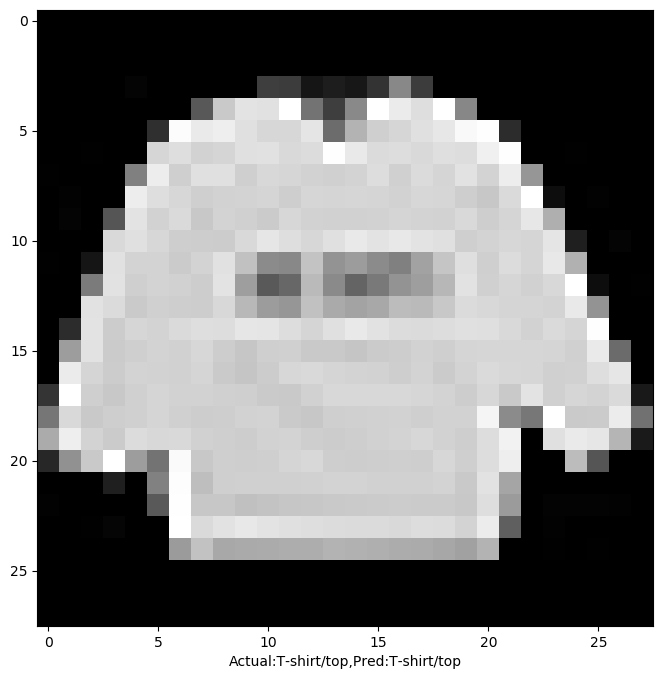

In [21]:
#Name of the cloth accessories in order
col_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))

plt.imshow(X_train_reshape[0],cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()